In [95]:
import pandas as pd
import matplotlib
import seaborn

print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)

Matplotlib version: 3.10.0
Seaborn version: 0.13.2


In [94]:
import sys
print(sys.executable)

/Users/Jennifer/Capstone-Project-Nursing-Home-Wages-Qual_Care-Analysis/capstone_env/bin/python


In [54]:
# Load the cleaned datasets
col_data = pd.read_csv('../data/cost_of_living_cleaned.csv')
min_wage_data = pd.read_csv('../data/minimum_wage_cleaned.csv')
bls_data = pd.read_csv('../data/bls_cleaned.csv')
provider_data = pd.read_csv('../data/provider_cleaned.csv')

# Verify successful loading
print("Cost of Living Data:")
print(col_data.head())

print("\nMinimum Wage Data:")
print(min_wage_data.head())

print("\nBLS Data:")
print(bls_data.head())

print("\nProvider Data:")
print(provider_data.head())

Cost of Living Data:
   rank state  cost_of_living_index  grocery  housing  utilities  \
0     1    WV                  84.8     98.4     61.3       96.4   
1     2    KS                  86.7     94.6     70.7      100.8   
2     3    MS                  87.5     96.8     72.2       89.4   
3     4    OK                  87.9     96.5     74.7       96.5   
4     5    AL                  88.8     97.8     71.4      100.5   

   transportation  health   misc.  
0            93.1     96.8   91.2  
1            92.2     92.6   90.3  
2            90.1     95.6   93.8  
3            90.6     99.3   90.5  
4            90.3     90.1   95.8  

Minimum Wage Data:
  state  minimum_wage  increases_planned
0    AL          7.25                  0
1    AK         11.91                  0
2    AZ         14.70                  0
3    AR         11.00                  0
4    CA         16.50                  0

BLS Data:
  area_title state occ_code                            occ_title  tot_emp  \


In [55]:
# Check for missing values
print("Missing values in Cost of Living Data:")
print(col_data.isnull().sum())

print("\nMissing values in Minimum Wage Data:")
print(min_wage_data.isnull().sum())

print("\nMissing values in BLS Data:")
print(bls_data.isnull().sum())

print("\nMissing values in Provider Data:")
print(provider_data.isnull().sum())

# Check for duplicates
print("\nDuplicate rows in Provider Data:")
print(provider_data.duplicated().sum())

Missing values in Cost of Living Data:
rank                    0
state                   0
cost_of_living_index    0
grocery                 0
housing                 0
utilities               0
transportation          0
health                  0
misc.                   0
dtype: int64

Missing values in Minimum Wage Data:
state                0
minimum_wage         0
increases_planned    0
dtype: int64

Missing values in BLS Data:
area_title            0
state                 0
occ_code              0
occ_title             0
tot_emp               0
hourly_median_wage    0
dtype: int64

Missing values in Provider Data:
state                0
provider_name        0
overall_rating     143
staffing_rating    198
qm_rating          265
latitude             0
longitude            0
dtype: int64

Duplicate rows in Provider Data:
1


In [57]:
# Identify all duplicate rows
duplicate_rows = provider_data[provider_data.duplicated(keep=False)]
print(duplicate_rows)

     state provider_name  overall_rating  staffing_rating  qm_rating  \
4457    IA  PRAIRIE GATE             NaN              NaN        NaN   
4458    IA  PRAIRIE GATE             NaN              NaN        NaN   

      latitude  longitude  
4457   41.2538    -95.811  
4458   41.2538    -95.811  


In [58]:
# Drop identical duplicate rows
provider_data = provider_data.drop_duplicates()

# Verify the result
print("Number of duplicates after cleaning:", provider_data.duplicated().sum())

Number of duplicates after cleaning: 0


In [59]:
print(min_wage_data.count())
print(col_data.count())

state                55
minimum_wage         55
increases_planned    55
dtype: int64
rank                    52
state                   52
cost_of_living_index    52
grocery                 52
housing                 52
utilities               52
transportation          52
health                  52
misc.                   52
dtype: int64


In [72]:
# Verify data types
print(bls_data.dtypes)

# Check the first few rows
print(bls_data.head())

area_title             object
state                  object
occ_code               object
occ_title              object
tot_emp                 int64
hourly_median_wage    float64
weighted_wage         float64
dtype: object
  area_title state occ_code                            occ_title  tot_emp  \
0    Alabama    AL  31-1120  Home Health and Personal Care Aides    19910   
1    Alabama    AL  31-1131                   Nursing Assistants    22430   
2    Alabama    AL  31-1132                            Orderlies      500   
3     Alaska    AK  31-1120  Home Health and Personal Care Aides     5660   
4     Alaska    AK  31-1131                   Nursing Assistants     1710   

   hourly_median_wage  weighted_wage  
0               11.45       227969.5  
1               14.69       329496.7  
2               14.38         7190.0  
3               17.81       100804.6  
4               21.87        37397.7  


In [73]:
# Calculate weighted wage
bls_data['weighted_wage'] = bls_data['hourly_median_wage'] * bls_data['tot_emp']

In [75]:
# Aggregate by state
bls_agg = bls_data.groupby('state').agg({
    'weighted_wage': 'sum',  # Total weighted wages
    'tot_emp': 'sum'         # Total employment
}).reset_index()

# Calculate weighted average hourly wage
bls_agg['hourly_median_wage'] = bls_agg['weighted_wage'] / bls_agg['tot_emp']

# Drop intermediate columns if desired
bls_agg = bls_agg[['state', 'hourly_median_wage']]

In [76]:
print("Weighted BLS Data:")
bls_agg.head(60)

Weighted BLS Data:


,state,hourly_median_wage
0,AK,18.752083
1,AL,13.180584
2,AR,14.121912
3,AZ,16.632967
4,CA,16.802503
5,CO,18.405378
6,CT,18.261715
7,DC,18.716331
8,DE,15.860027
9,FL,16.271242


In [77]:
print("Aggregated BLS Data (Weighted Averages):")
print(bls_agg.head())

Aggregated BLS Data (Weighted Averages):
  state  hourly_median_wage
0    AK           18.752083
1    AL           13.180584
2    AR           14.121912
3    AZ           16.632967
4    CA           16.802503


In [78]:
# Save the weighted BLS data
bls_agg.to_csv('../data/bls_weighted.csv', index=False)

In [80]:
bls_agg.shape

(54, 2)

In [81]:
# Merge Cost of Living and Minimum Wage Data
state_level_data = pd.merge(col_data, min_wage_data, on='state', how='inner')

# Verify the result
print("State-Level Data (Step 1):")
print(state_level_data.head())

State-Level Data (Step 1):
   rank state  cost_of_living_index  grocery  housing  utilities  \
0     1    WV                  84.8     98.4     61.3       96.4   
1     2    KS                  86.7     94.6     70.7      100.8   
2     3    MS                  87.5     96.8     72.2       89.4   
3     4    OK                  87.9     96.5     74.7       96.5   
4     5    AL                  88.8     97.8     71.4      100.5   

   transportation  health   misc.  minimum_wage  increases_planned  
0            93.1     96.8   91.2          8.75                  0  
1            92.2     92.6   90.3          7.25                  0  
2            90.1     95.6   93.8          7.25                  0  
3            90.6     99.3   90.5          7.25                  0  
4            90.3     90.1   95.8          7.25                  0  


In [82]:
state_level_data.shape

(52, 11)

In [83]:
# Merge BLS Weighted Data
state_level_data = pd.merge(state_level_data, bls_agg, on='state', how='inner')

# Verify the result
print("State-Level Data (Step 2):")
print(state_level_data.head())

State-Level Data (Step 2):
   rank state  cost_of_living_index  grocery  housing  utilities  \
0     1    WV                  84.8     98.4     61.3       96.4   
1     2    KS                  86.7     94.6     70.7      100.8   
2     3    MS                  87.5     96.8     72.2       89.4   
3     4    OK                  87.9     96.5     74.7       96.5   
4     5    AL                  88.8     97.8     71.4      100.5   

   transportation  health   misc.  minimum_wage  increases_planned  \
0            93.1     96.8   91.2          8.75                  0   
1            92.2     92.6   90.3          7.25                  0   
2            90.1     95.6   93.8          7.25                  0   
3            90.6     99.3   90.5          7.25                  0   
4            90.3     90.1   95.8          7.25                  0   

   hourly_median_wage  
0           13.802066  
1           15.113295  
2           12.238887  
3           14.094471  
4           13.180584  

In [84]:
# Merge provider data with state-level information
provider_enriched = pd.merge(provider_data, state_level_data, on='state', how='left')

# Verify the result
print("Provider-Enriched Data:")
print(provider_enriched.head())

# Save the dataset
provider_enriched.to_csv('../data/final_provider_data.csv', index=False)

Provider-Enriched Data:
  state                                provider_name  overall_rating  \
0    AL                     BURNS NURSING HOME, INC.             2.0   
1    AL               COOSA VALLEY HEALTHCARE CENTER             4.0   
2    AL                   HIGHLANDS HEALTH AND REHAB             4.0   
3    AL  EASTVIEW REHABILITATION & HEALTHCARE CENTER             2.0   
4    AL                PLANTATION MANOR NURSING HOME             2.0   

   staffing_rating  qm_rating  latitude  longitude  rank  \
0              4.0        4.0   34.5149    -87.736   5.0   
1              3.0        3.0   33.1637    -86.254   5.0   
2              3.0        2.0   34.6611    -86.047   5.0   
3              1.0        2.0   33.5595    -86.722   5.0   
4              4.0        2.0   33.3221    -87.034   5.0   

   cost_of_living_index  grocery  housing  utilities  transportation  health   \
0                  88.8     97.8     71.4      100.5            90.3     90.1   
1                  8

In [85]:
# Aggregate provider data to state level
provider_agg = provider_data.groupby('state').agg({
    'overall_rating': 'mean',  # Average overall rating
    'staffing_rating': 'mean',  # Average staffing rating
    'qm_rating': 'mean',  # Average quality measure rating
    'latitude': 'mean',  # Average latitude for visualization (optional)
    'longitude': 'mean'  # Average longitude for visualization (optional)
}).reset_index()

# Merge aggregated provider data with state-level data
state_level_aggregated = pd.merge(state_level_data, provider_agg, on='state', how='inner')

# Verify the result
print("State-Level Aggregated Data:")
print(state_level_aggregated.head())

# Save the dataset
state_level_aggregated.to_csv('../data/final_state_level_data.csv', index=False)

State-Level Aggregated Data:
   rank state  cost_of_living_index  grocery  housing  utilities  \
0     1    WV                  84.8     98.4     61.3       96.4   
1     2    KS                  86.7     94.6     70.7      100.8   
2     3    MS                  87.5     96.8     72.2       89.4   
3     4    OK                  87.9     96.5     74.7       96.5   
4     5    AL                  88.8     97.8     71.4      100.5   

   transportation  health   misc.  minimum_wage  increases_planned  \
0            93.1     96.8   91.2          8.75                  0   
1            92.2     92.6   90.3          7.25                  0   
2            90.1     95.6   93.8          7.25                  0   
3            90.6     99.3   90.5          7.25                  0   
4            90.3     90.1   95.8          7.25                  0   

   hourly_median_wage  overall_rating  staffing_rating  qm_rating   latitude  \
0           13.802066        2.491667         2.525000   2.69

In [86]:
# Summary of key metrics
print(provider_enriched.describe())

       overall_rating  staffing_rating     qm_rating      latitude  \
count    14664.000000     14609.000000  14542.000000  14806.000000   
mean         2.844585         2.717434      3.407303     38.007832   
std          1.431345         1.275334      1.291302      4.935929   
min          1.000000         1.000000      1.000000     13.488600   
25%          2.000000         2.000000      2.000000     34.189475   
50%          3.000000         3.000000      4.000000     39.049000   
75%          4.000000         4.000000      5.000000     41.507275   
max          5.000000         5.000000      5.000000     66.895300   

          longitude          rank  cost_of_living_index       grocery  \
count  14806.000000  14805.000000          14805.000000  14805.000000   
mean     -90.600308     24.880108            102.422134    100.499352   
std       14.327783     14.875377             17.451369      5.049023   
min     -165.200000      1.000000             84.800000     94.600000   
25% 

In [87]:
# Top 5 highest-rated providers
print(provider_enriched.sort_values(by='overall_rating', ascending=False).head())

# Bottom 5 lowest-rated providers
print(provider_enriched.sort_values(by='overall_rating', ascending=True).head())

      state                          provider_name  overall_rating  \
6651     MN  CAPITOL VIEW TRANSITIONAL CARE CENTER             5.0   
11884    TN             LIFE CARE CENTER OF SPARTA             5.0   
6723     MN                      MOUNT OLIVET HOME             5.0   
6722     MN                          NORRIS SQUARE             5.0   
6721     MN          MN VETERANS HOME FERGUS FALLS             5.0   

       staffing_rating  qm_rating  latitude  longitude  rank  \
6651               5.0        5.0   44.9551    -93.096  24.0   
11884              4.0        3.0   35.9521    -85.486   8.0   
6723               4.0        5.0   44.9030    -93.288  24.0   
6722               5.0        4.0   44.8329    -92.967  24.0   
6721               5.0        3.0   46.3017    -96.076  24.0   

       cost_of_living_index  grocery  housing  utilities  transportation  \
6651                   95.3    102.0     80.3       98.0            98.3   
11884                  90.0     97.1     8

In [88]:
# Summary of state-level metrics
print(state_level_aggregated.describe())

            rank  cost_of_living_index     grocery     housing   utilities  \
count  52.000000             52.000000   52.000000   52.000000   52.000000   
mean   26.500000            103.359615  101.476923  107.486538  103.650000   
std    15.154757             18.220396    6.973243   45.322665   23.425866   
min     1.000000             84.800000   94.600000   61.300000   77.700000   
25%    13.750000             92.300000   97.700000   79.725000   90.775000   
50%    26.500000             96.550000   99.400000   89.900000   98.000000   
75%    39.250000            111.550000  102.775000  117.350000  105.125000   
max    52.000000            184.600000  135.900000  302.600000  210.000000   

       transportation     health        misc.  minimum_wage  \
count       52.000000   52.000000   52.000000     52.000000   
mean       101.432692  101.550000  101.513462     11.117885   
std          9.817266   12.109719    7.644376      3.531562   
min         88.100000   71.000000   90.300000

In [90]:
# Top 5 states by overall rating
print(state_level_aggregated.sort_values(by='overall_rating', ascending=False).head())

# Bottom 5 states by overall rating
state_level_aggregated.sort_values(by='overall_rating', ascending=True).head()

    rank state  cost_of_living_index  grocery  housing  utilities  \
51    52    HI                 184.6    135.9    302.6      210.0   
34    35    PR                 102.5    110.0    102.4      148.1   
47    48    AK                 123.4    125.1    117.8      157.4   
32    33    ID                 102.0    101.9     99.1       77.7   
48    49    DC                 138.1    104.7    213.0      100.5   

    transportation  health   misc.  minimum_wage  increases_planned  \
51           133.7    123.7  124.9         14.00                  1   
34            93.8     71.0   94.4         10.50                  0   
47           115.7    146.4  117.6         11.91                  0   
32           109.2    101.4  108.7          7.25                  0   
48           108.4    114.8  112.5         17.50                  0   

    hourly_median_wage  overall_rating  staffing_rating  qm_rating   latitude  \
51           18.696943        3.682927         4.048780   4.536585  21.095200

,rank,state,cost_of_living_index,grocery,housing,utilities,transportation,health,misc.,minimum_wage,increases_planned,hourly_median_wage,overall_rating,staffing_rating,qm_rating,latitude,longitude
18,19,LA,93.5,96.6,84.4,81.1,97.4,95.2,101.5,7.25,0,11.259343,2.221805,2.210728,1.921875,31.047163,-91.911341
10,11,GA,91.5,97.4,79.2,100.4,95.7,97.9,94.8,7.25,0,15.103560,2.393768,2.147727,2.636103,33.060582,-83.649190
25,26,IL,95.5,98.3,84.2,99.4,107.7,100.6,98.2,15.00,0,17.636568,2.460741,2.032738,2.918033,40.920956,-88.645482
5,6,MO,89.0,97.0,78.6,98.0,88.3,91.6,91.7,13.75,0,14.759896,2.460744,2.041580,2.675052,38.393894,-92.205147
2,3,MS,87.5,96.8,72.2,89.4,90.1,95.6,93.8,7.25,0,12.238887,2.477612,3.410000,2.005000,32.631514,-89.600455


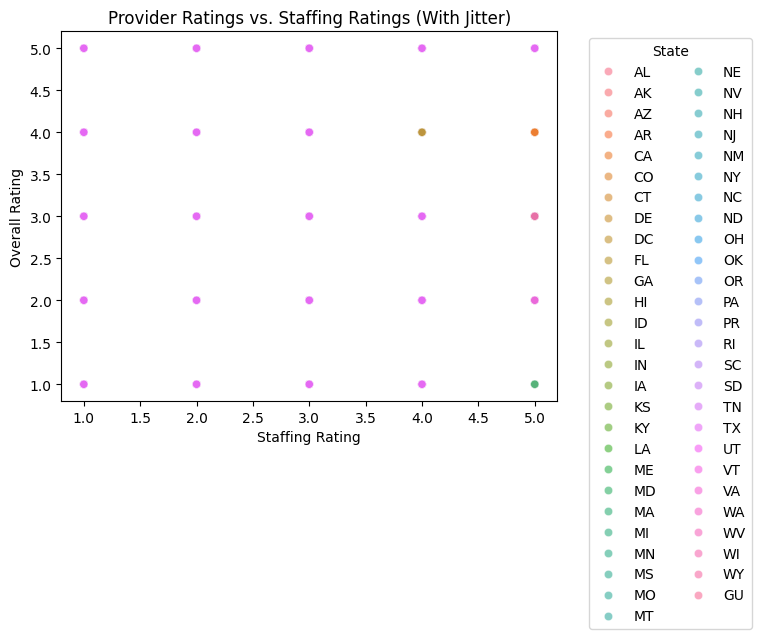

In [97]:

# Scatter plot: Overall Rating vs. Staffing Rating
sns.scatterplot(
    data=provider_enriched, 
    x='staffing_rating', 
    y='overall_rating', 
    hue='state', 
    alpha=0.6
)
plt.title('Provider Ratings vs. Staffing Ratings (With Jitter)')
plt.xlabel('Staffing Rating')
plt.ylabel('Overall Rating')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

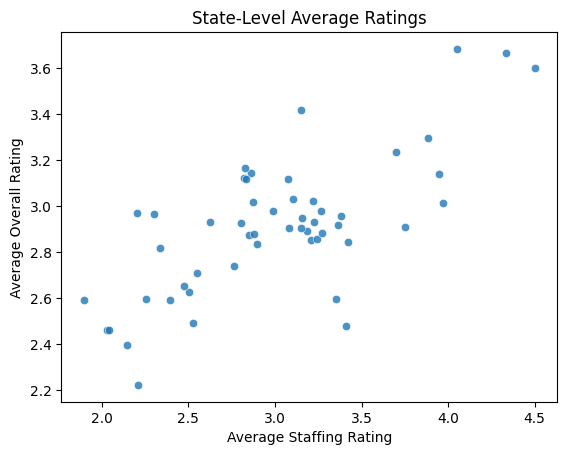

In [98]:
# Aggregate provider data to state level
provider_agg = provider_enriched.groupby('state').agg({
    'overall_rating': 'mean',
    'staffing_rating': 'mean',
    'qm_rating': 'mean'
}).reset_index()

# Scatter plot for state-level averages
sns.scatterplot(
    data=provider_agg, 
    x='staffing_rating', 
    y='overall_rating', 
    alpha=0.8
)
plt.title('State-Level Average Ratings')
plt.xlabel('Average Staffing Rating')
plt.ylabel('Average Overall Rating')
plt.show()

/var/folders/v1/kd7vp3vx4hj0k83mn3s7qhxw0000gp/T/ipykernel_54034/1427152809.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


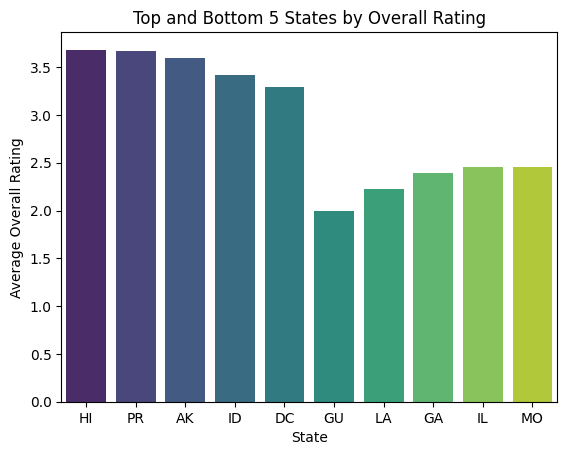

In [99]:
# Identify top and bottom 5 states by overall_rating
top_states = provider_agg.nlargest(5, 'overall_rating')
bottom_states = provider_agg.nsmallest(5, 'overall_rating')

# Combine top and bottom states
focus_states = pd.concat([top_states, bottom_states])

# Bar plot for focused states
sns.barplot(
    data=focus_states, 
    x='state', 
    y='overall_rating', 
    palette='viridis'
)
plt.title('Top and Bottom 5 States by Overall Rating')
plt.xlabel('State')
plt.ylabel('Average Overall Rating')
plt.show()

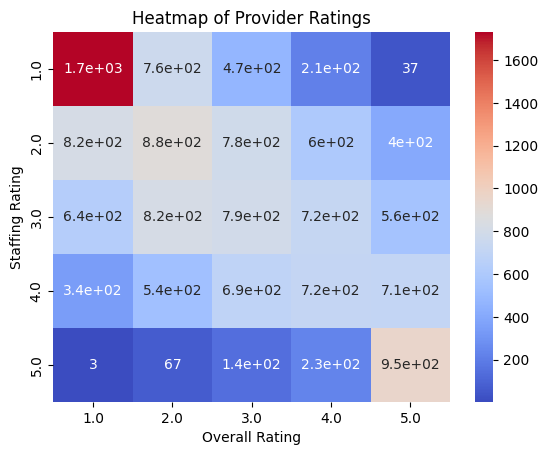

In [100]:
# Create a pivot table for heatmap
heatmap_data = provider_enriched.pivot_table(
    index='staffing_rating', 
    columns='overall_rating', 
    values='provider_name', 
    aggfunc='count'
)

# Plot heatmap
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Provider Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Staffing Rating')
plt.show()

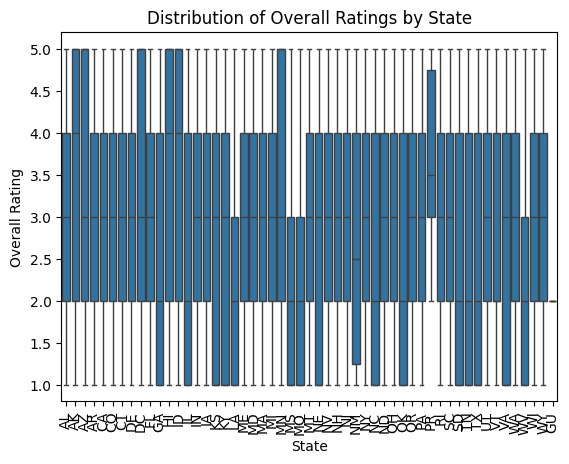

In [101]:
sns.boxplot(
    data=provider_enriched, 
    x='state', 
    y='overall_rating'
)
plt.title('Distribution of Overall Ratings by State')
plt.xticks(rotation=90)
plt.ylabel('Overall Rating')
plt.xlabel('State')
plt.show()